In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from mne.io import RawArray
from mne import create_info

In [4]:
%matplotlib notebook

In [5]:
data = np.load('resampled.npy')

In [6]:
data_f = np.fft.fft(data[1])

<IPython.core.display.Javascript object>


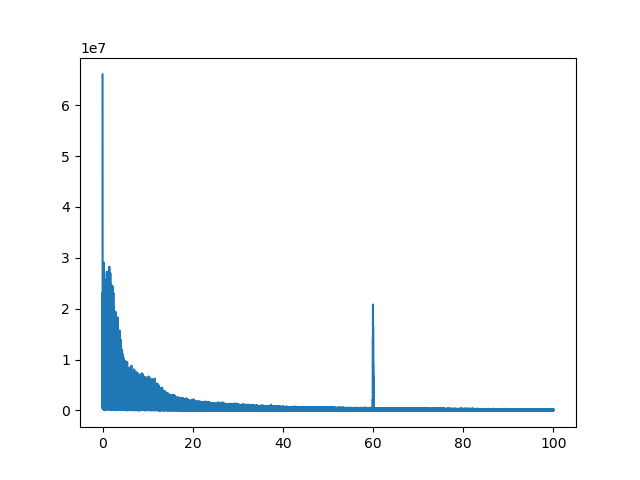

In [7]:
plt.plot(np.arange(int(len(data_f)/2))/len(data_f)*200, np.abs(data_f[:int(len(data_f)/2)]))

In [6]:
info_m = create_info(data.shape[0], 200, 'misc')
info_e = create_info(data.shape[0], 200, 'eeg')

In [7]:
raw_m = RawArray(data, info_m)
raw_e = RawArray(data, info_e)
raw_l = RawArray(data[:,:int(data.shape[1]/2)], info_e)
raw_r = RawArray(data[:,int(data.shape[1]/2):], info_e)

Creating RawArray with float64 data, n_channels=124, n_times=2359235
    Range : 0 ... 2359234 =      0.000 ... 11796.170 secs
Ready.
Creating RawArray with float64 data, n_channels=124, n_times=2359235
    Range : 0 ... 2359234 =      0.000 ... 11796.170 secs
Ready.
Creating RawArray with float64 data, n_channels=124, n_times=1179617
    Range : 0 ... 1179616 =      0.000 ...  5898.080 secs
Ready.
Creating RawArray with float64 data, n_channels=124, n_times=1179618
    Range : 0 ... 1179617 =      0.000 ...  5898.085 secs
Ready.


<IPython.core.display.Javascript object>


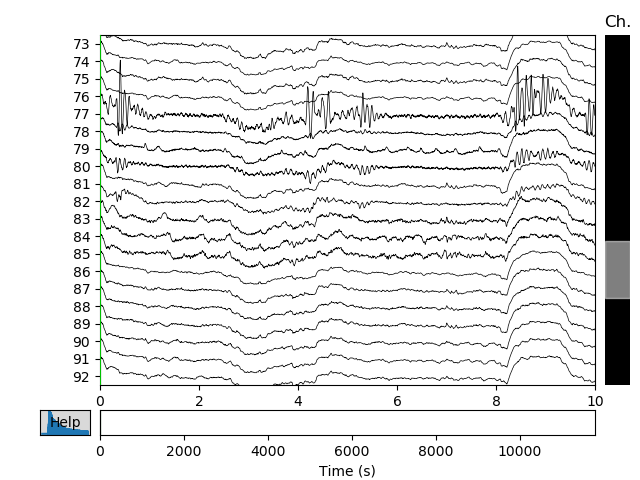

In [12]:
fig = raw_m.plot(n_channels=20)

In [8]:
#This isn't used right now??
#Include 60 Hz notch filter too
filtered = raw_e.copy()
filtered.load_data().filter(l_freq=1., h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 661 samples (3.305 sec)



<RawArray  |  None, n_channels x n_times : 124 x 2359235 (11796.2 sec), ~2.18 GB, data loaded>

In [9]:
filtered.load_data().notch_filter(np.array([60]))

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1321 samples (6.605 sec)



<RawArray  |  None, n_channels x n_times : 124 x 2359235 (11796.2 sec), ~2.18 GB, data loaded>

In [10]:
np.save('filtered', filtered.get_data())

In [11]:
data_filt = np.load('filtered.npy')

In [15]:
data_f = np.fft.fft(data_filt[1])

In [16]:
plt.plot(np.arange(int(len(data_f)/2))/len(data_f)*200, np.abs(data_f[:int(len(data_f)/2)]))

In [12]:
info_m = create_info(data_filt.shape[0], 200, 'misc')
info_e = create_info(data_filt.shape[0], 200, 'eeg')

In [13]:
raw_m = RawArray(data_filt, info_m)
raw_e = RawArray(data_filt, info_e)
raw_l = RawArray(data_filt[:,:int(data_filt.shape[1]/2)], info_e)
raw_r = RawArray(data_filt[:,int(data_filt.shape[1]/2):], info_e)

Creating RawArray with float64 data, n_channels=124, n_times=2359235
    Range : 0 ... 2359234 =      0.000 ... 11796.170 secs
Ready.
Creating RawArray with float64 data, n_channels=124, n_times=2359235
    Range : 0 ... 2359234 =      0.000 ... 11796.170 secs
Ready.
Creating RawArray with float64 data, n_channels=124, n_times=1179617
    Range : 0 ... 1179616 =      0.000 ...  5898.080 secs
Ready.
Creating RawArray with float64 data, n_channels=124, n_times=1179618
    Range : 0 ... 1179617 =      0.000 ...  5898.085 secs
Ready.


<IPython.core.display.Javascript object>


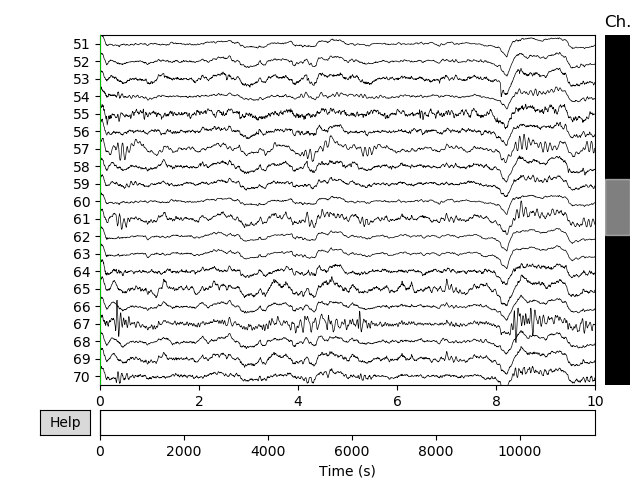

In [14]:
fig = raw_m.plot(n_channels=20)

In [18]:
def cosine_dist(A,B):
    M = np.empty((A.shape[0], B.shape[0]))
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            M[i][j] = np.dot(A[i], B[j]) / (np.linalg.norm(A[i]) * np.linalg.norm(B[j]))
    return(M)

In [15]:
from mne.preprocessing import ICA

In [16]:
ica5 = ICA(max_pca_components=None, n_components=5, method='picard')
ica6 = ICA(max_pca_components=None, n_components=6, method='picard')
ica7 = ICA(max_pca_components=None, n_components=7, method='picard')
ica8 = ICA(max_pca_components=None, n_components=8, method='picard')
ica9 = ICA(max_pca_components=None, n_components=9, method='picard')
ica10 = ICA(max_pca_components=None, n_components=10, method='picard')

In [53]:
ica4 = ICA(max_pca_components=None, n_components=4, method='picard')
ica4.fit(raw_e, picks='all')

Fitting ICA to data using 124 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 4 components
Fitting ICA took 113.0s.


<ICA  |  raw data decomposition, fit (picard): 2359235 samples, 4 components, channels used: "eeg">

In [17]:
ica5.fit(raw_e, picks='all')
ica6.fit(raw_e, picks='all')

Fitting ICA to data using 124 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 5 components
Fitting ICA took 122.7s.
Fitting ICA to data using 124 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 6 components
Fitting ICA took 123.7s.


<ICA  |  raw data decomposition, fit (picard): 2359235 samples, 6 components, channels used: "eeg">

In [22]:
ica7.fit(raw_e, picks='all')

Fitting ICA to data using 124 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 7 components
Fitting ICA took 313.2s.


<ICA  |  raw data decomposition, fit (picard): 2359235 samples, 7 components, channels used: "eeg">

In [27]:
ica8.fit(raw_e, picks='all')

Fitting ICA to data using 124 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 8 components
Fitting ICA took 344.1s.


<ICA  |  raw data decomposition, fit (picard): 2359235 samples, 8 components, channels used: "eeg">

In [33]:
ica9.fit(raw_e, picks='all')

Fitting ICA to data using 124 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 9 components
Fitting ICA took 362.6s.


<ICA  |  raw data decomposition, fit (picard): 2359235 samples, 9 components, channels used: "eeg">

In [43]:
ica10.fit(raw_e, picks='all')

Fitting ICA to data using 124 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 10 components
Fitting ICA took 675.5s.


<ICA  |  raw data decomposition, fit (picard): 2359235 samples, 10 components, channels used: "eeg">

In [54]:
data4 = ica4.get_sources(raw_m.load_data())._data

In [23]:
data5 = ica5.get_sources(raw_m.load_data())._data
data6 = ica6.get_sources(raw_m.load_data())._data
data7 = ica7.get_sources(raw_m.load_data())._data

In [28]:
data8 = ica8.get_sources(raw_m.load_data())._data

In [34]:
data9 = ica9.get_sources(raw_m.load_data())._data

In [44]:
data10 = ica10.get_sources(raw_m.load_data())._data

<IPython.core.display.Javascript object>


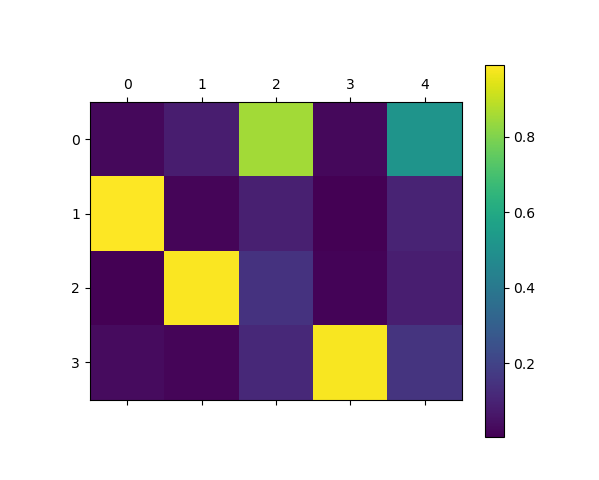

In [55]:
plt.matshow(np.abs(cosine_dist(data4, data5)))
plt.colorbar()

<IPython.core.display.Javascript object>


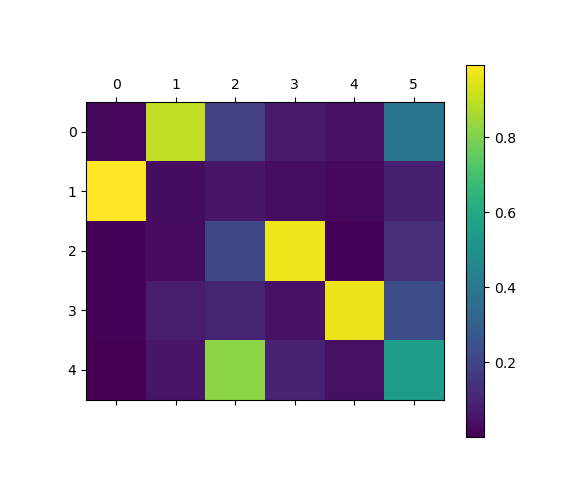

In [47]:
plt.matshow(np.abs(cosine_dist(data5, data6)))
plt.colorbar()

<IPython.core.display.Javascript object>


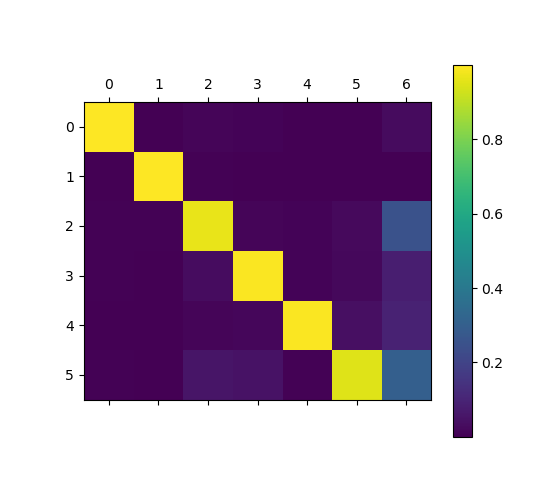

In [48]:
plt.matshow(np.abs(cosine_dist(data6, data7)))
plt.colorbar()

<IPython.core.display.Javascript object>


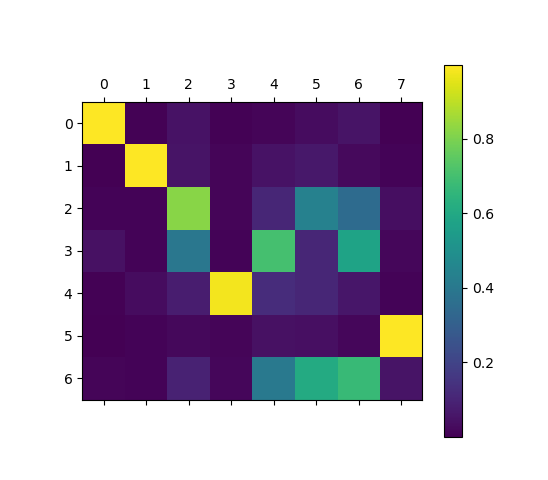

In [49]:
plt.matshow(np.abs(cosine_dist(data7, data8)))
plt.colorbar()

<IPython.core.display.Javascript object>


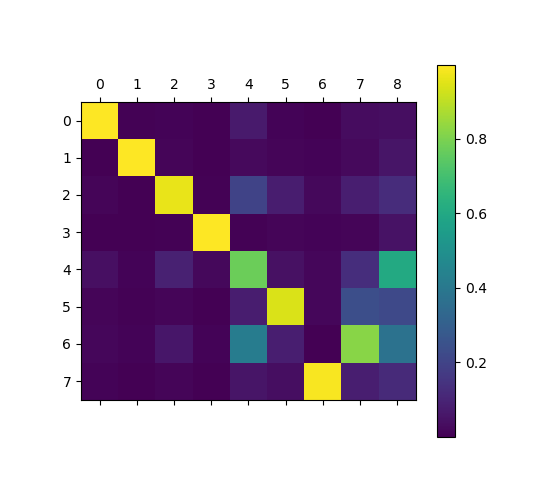

In [50]:
plt.matshow(np.abs(cosine_dist(data8, data9)))
plt.colorbar()

<IPython.core.display.Javascript object>


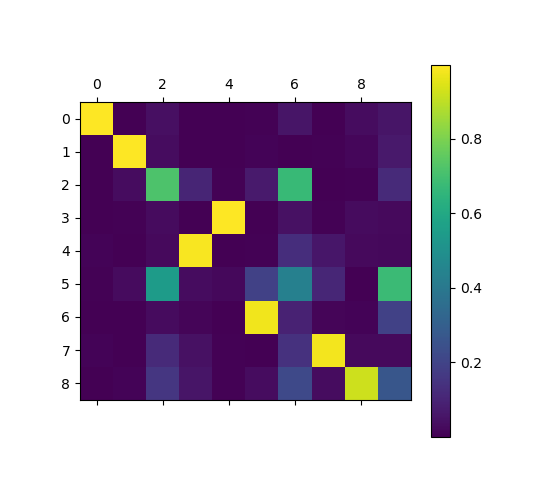

In [51]:
plt.matshow(np.abs(cosine_dist(data9, data10)))
plt.colorbar()

<IPython.core.display.Javascript object>


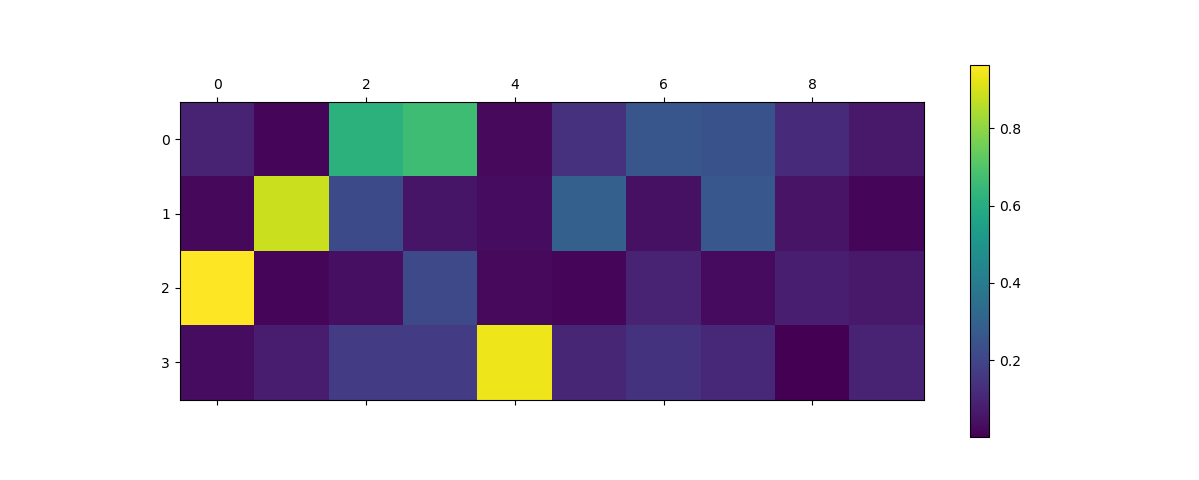

In [56]:
plt.matshow(np.abs(cosine_dist(data4, data10)))
plt.colorbar()

<IPython.core.display.Javascript object>


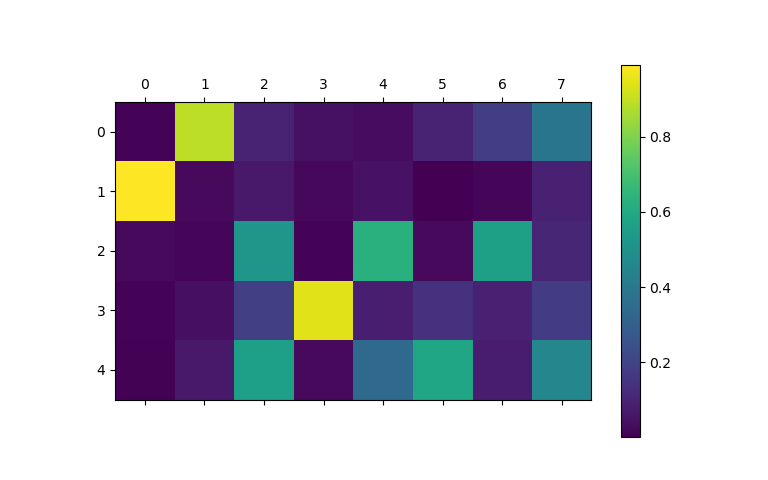

In [62]:
plt.matshow(np.abs(cosine_dist(data5, data8)))
plt.colorbar()

In [42]:
ica = ICA(max_pca_components=None, n_components=15, method='picard')
ica_l = ICA(max_pca_components=None, n_components=15, method='picard')
ica_r = ICA(max_pca_components=None, n_components=15, method='picard')

In [43]:
ica5 = ICA(max_pca_components=None, n_components=5, method='picard')
ica6 = ICA(max_pca_components=None, n_components=6, method='picard')

In [44]:
ica.fit(raw_e, picks='all')

Fitting ICA to data using 124 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 15 components
Fitting ICA took 264.6s.


<ICA  |  raw data decomposition, fit (picard): 2359235 samples, 15 components, channels used: "eeg">

In [27]:
ica_l.fit(raw_l, picks='all')

Fitting ICA to data using 124 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 15 components
Fitting ICA took 133.3s.


<ICA  |  raw data decomposition, fit (picard): 1179617 samples, 15 components, channels used: "eeg">

In [28]:
ica_r.fit(raw_r, picks='all')

Fitting ICA to data using 124 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 15 components
Fitting ICA took 148.8s.


<ICA  |  raw data decomposition, fit (picard): 1179618 samples, 15 components, channels used: "eeg">

In [45]:
ica5.fit(raw_e, picks='all')
ica6.fit(raw_e, picks='all')

Fitting ICA to data using 124 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 5 components
Fitting ICA took 148.7s.
Fitting ICA to data using 124 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 6 components
Fitting ICA took 139.6s.


<ICA  |  raw data decomposition, fit (picard): 2359235 samples, 6 components, channels used: "eeg">

In [46]:
test5 = ica5.get_sources(raw_m.load_data())._data
test6 = ica6.get_sources(raw_m.load_data())._data

<IPython.core.display.Javascript object>


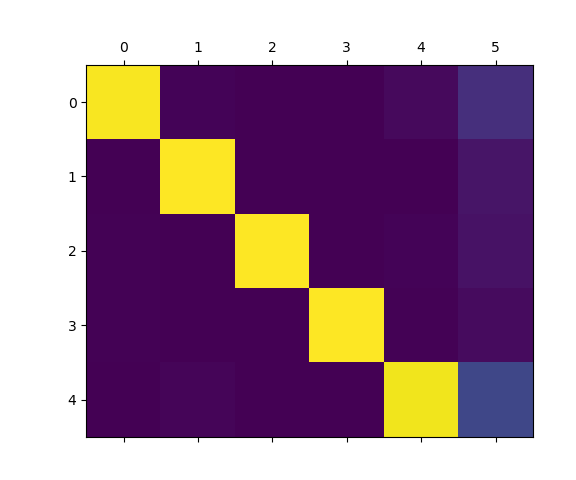

In [50]:
plt.matshow(np.abs(corr(test5, test6)))

<IPython.core.display.Javascript object>


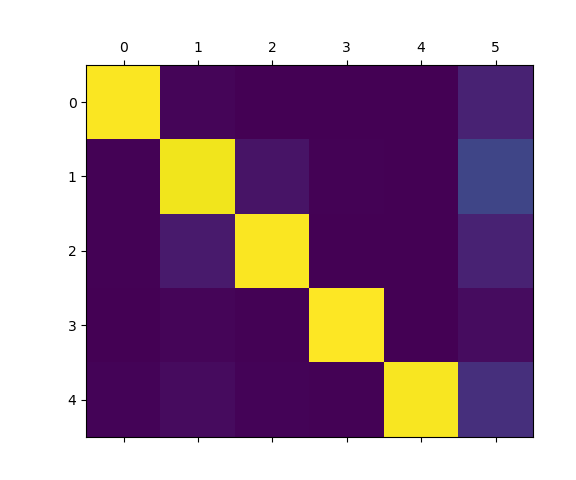

In [83]:
plt.matshow(np.abs(corr(test5, test6)))

<IPython.core.display.Javascript object>


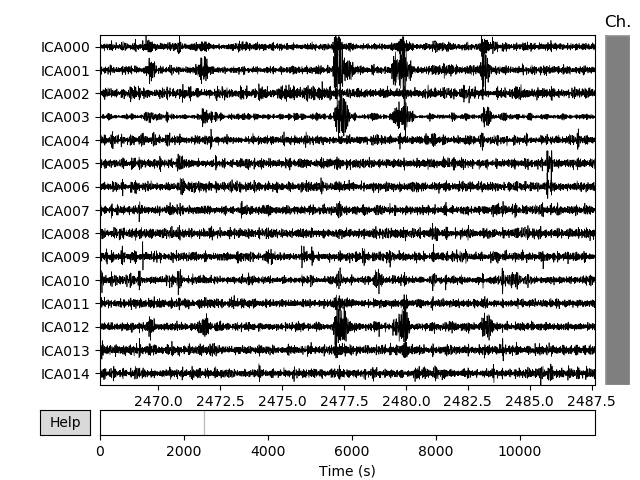

In [51]:
raw_e.load_data()
_ = ica.plot_sources(raw_e)

<IPython.core.display.Javascript object>


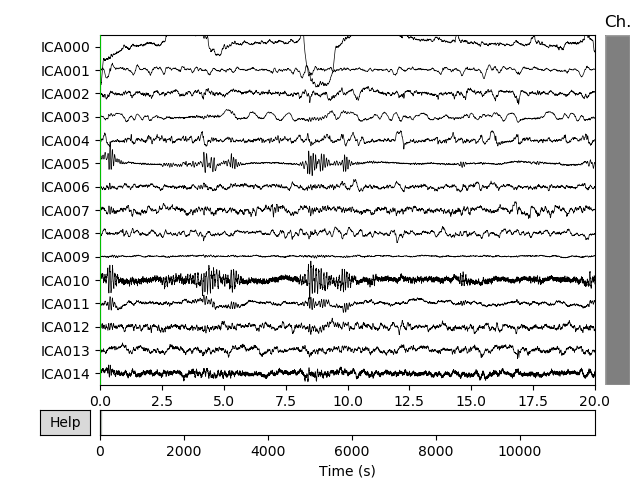

In [21]:
raw_e.load_data()
_ = ica.plot_sources(raw_e)

Transforming to ICA space (15 components)
Zeroing out 1 ICA components


<IPython.core.display.Javascript object>


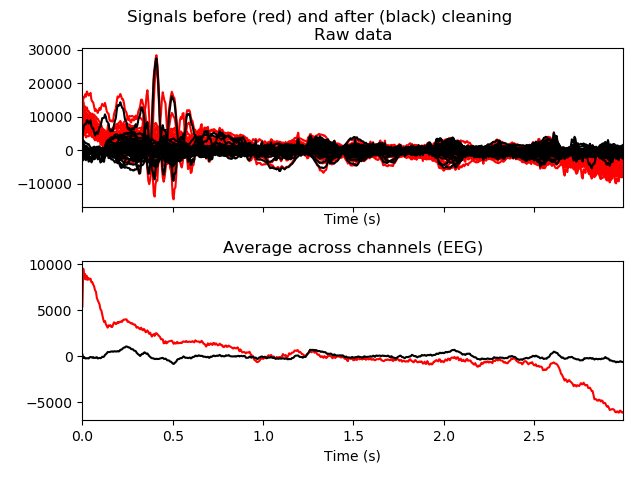

<IPython.core.display.Javascript object>


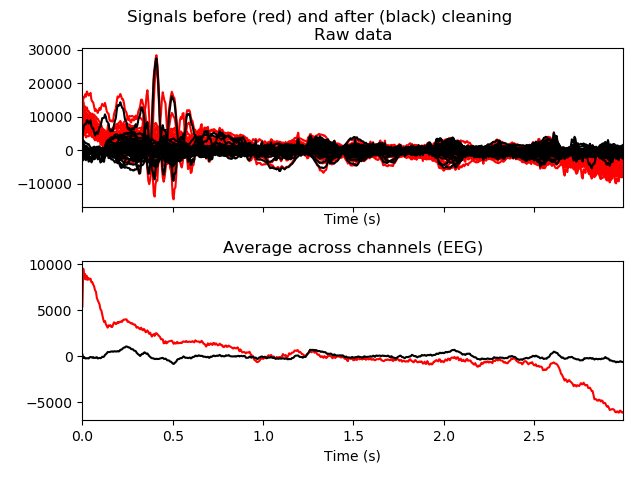

In [36]:
ica.plot_overlay(raw, exclude=[0], picks='eeg')

<IPython.core.display.Javascript object>


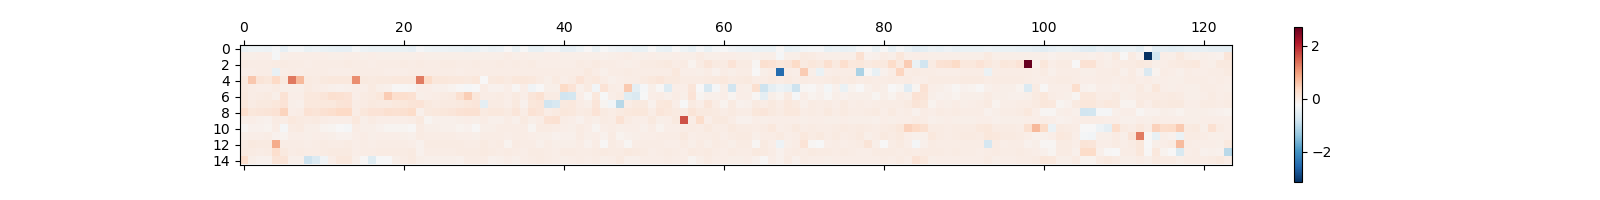

In [52]:
plt.matshow(np.transpose(ica.get_components()), cmap='RdBu_r')
plt.colorbar()

<IPython.core.display.Javascript object>


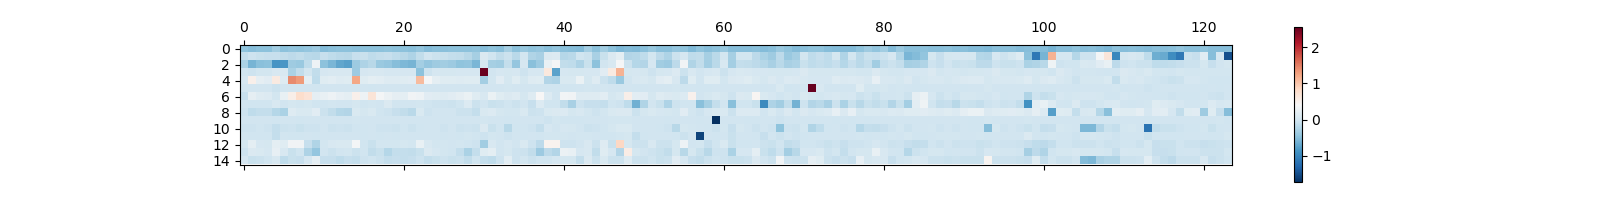

In [16]:
plt.matshow(np.transpose(ica.get_components()), cmap='RdBu_r')
plt.colorbar()

<IPython.core.display.Javascript object>


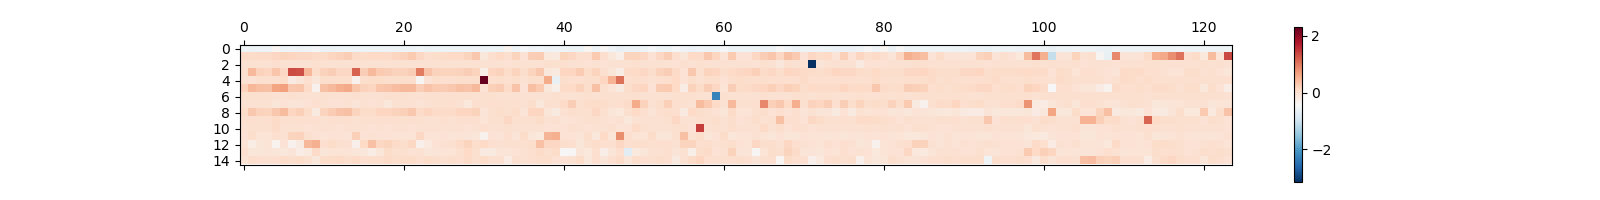

In [34]:
plt.matshow(np.transpose(ica_l.get_components()), cmap='RdBu_r')
plt.colorbar()

<IPython.core.display.Javascript object>


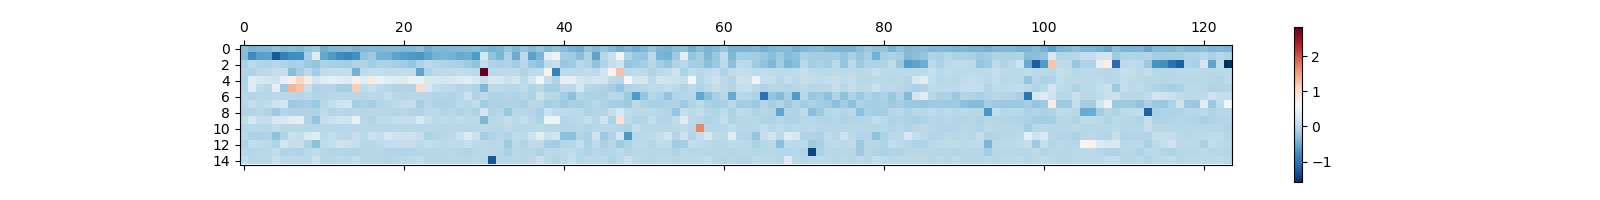

In [31]:
plt.matshow(np.transpose(ica_r.get_components()), cmap='RdBu_r')
plt.colorbar()

In [35]:
comp_l = ica_l.get_components()
comp_r = ica_r.get_components()

In [49]:
def corr(A,B):
    M = np.empty((A.shape[0], B.shape[0]))
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            M[i][j] = np.dot(A[i], B[j])
    return(M)

<IPython.core.display.Javascript object>


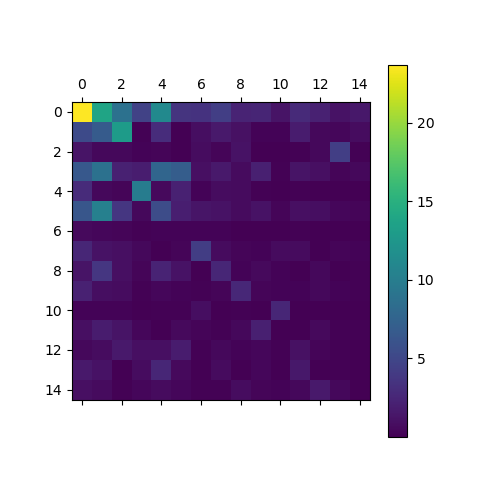

In [66]:
plt.matshow(np.abs(corr(comp_l.T,comp_r.T)))
plt.colorbar()

In [38]:
comp_r.shape

(124, 15)

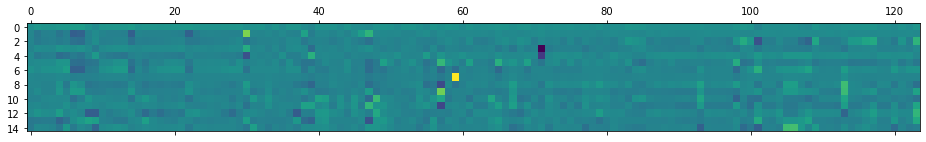

In [16]:
plt.matshow(ica.pca_components_)

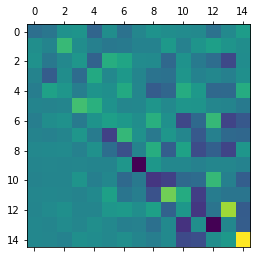

In [17]:
plt.matshow(ica.unmixing_matrix_)

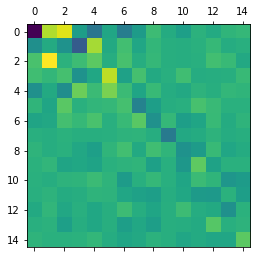

In [18]:
plt.matshow(ica.mixing_matrix_)

In [ ]:
ica.__dict__

<IPython.core.display.Javascript object>


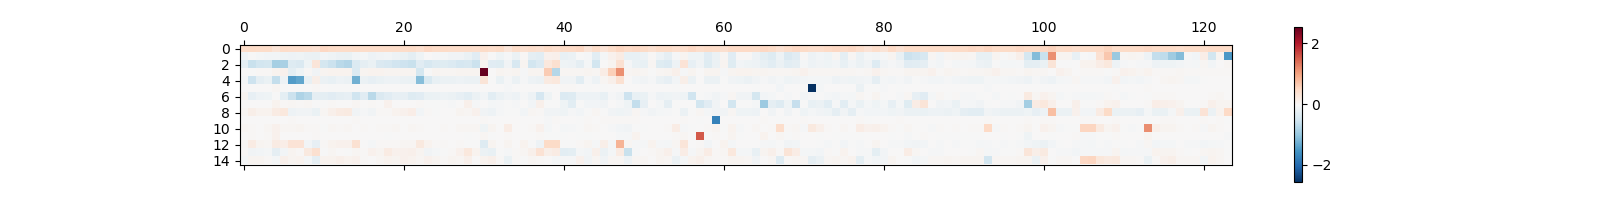

In [18]:
plt.matshow(np.transpose(ica.get_components()), cmap='RdBu_r')
plt.colorbar()

In [97]:
test = ica.pca_explained_variance_.reshape(15,1) + np.zeros(124)

In [99]:
test2 = ica.pca_components_ * test

In [101]:
ica.pca_components_.shape

(15, 124)

<IPython.core.display.Javascript object>


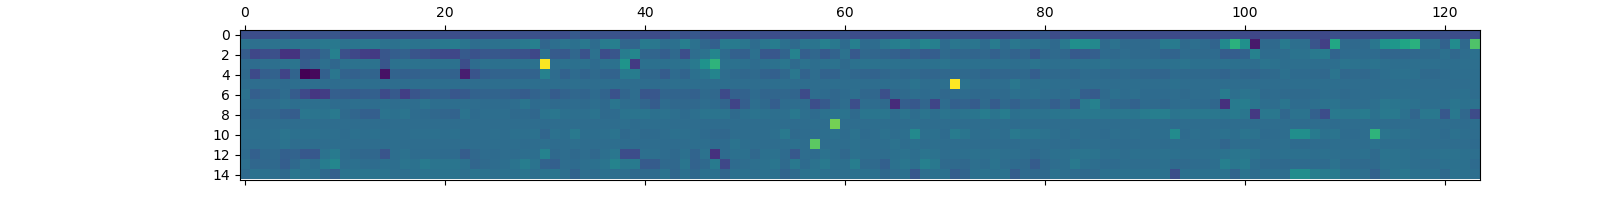

In [76]:
plt.matshow(np.dot(ica.mixing_matrix_.T, ica.pca_components_))

<IPython.core.display.Javascript object>


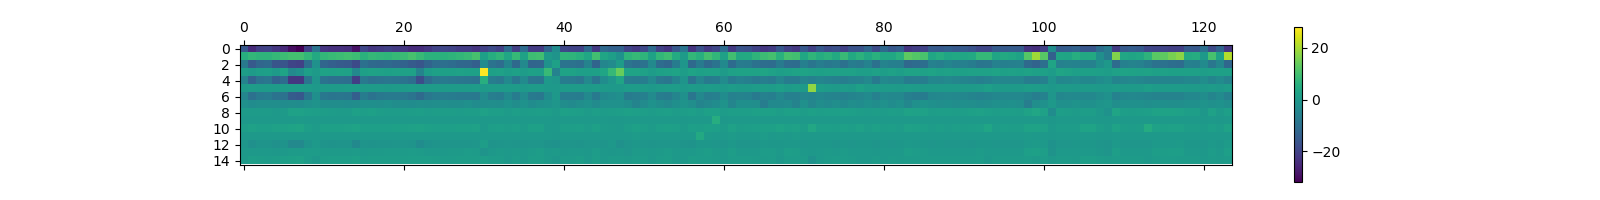

In [103]:
plt.matshow(np.dot(ica.mixing_matrix_.T, test2))
plt.colorbar()

In [69]:
reconst_raw = raw.copy()
ica.apply(reconst_raw,exclude=[0,1,2])

Transforming to ICA space (15 components)
Zeroing out 3 ICA components


<RawArray  |  None, n_channels x n_times : 124 x 2359235 (11796.2 sec), ~2.18 GB, data loaded>

<IPython.core.display.Javascript object>


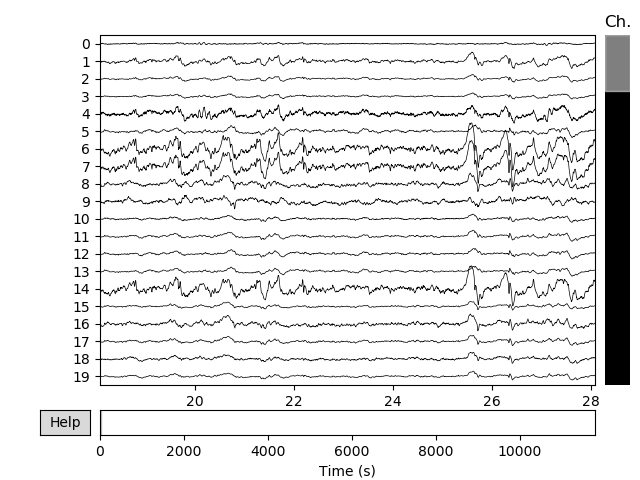

<IPython.core.display.Javascript object>


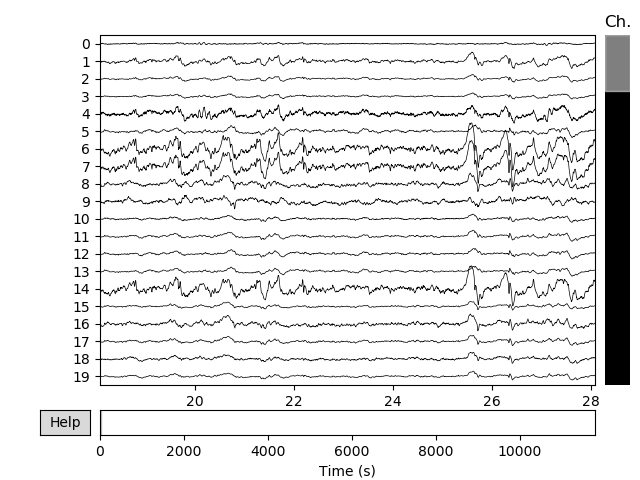

In [70]:
reconst_raw.plot()